## Group 1: Week 12

# 'Game of Thrones' Story Through a Data Science Narrative

****

In [1]:
# import required libraries
import os
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### Load Data

In [2]:
# set the path to the data files directory
home = os.getcwd()
the_path = home + '/Data/'

# read the csv files into dataframes
data_list = ['battles', 'deaths', 'predictions']

for data in data_list:
    file_path = the_path + str(data) + '.csv'
    the_code = str(data) + ' = pd.read_csv(file_path)'
    exec(the_code)

deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


### Review the Battles

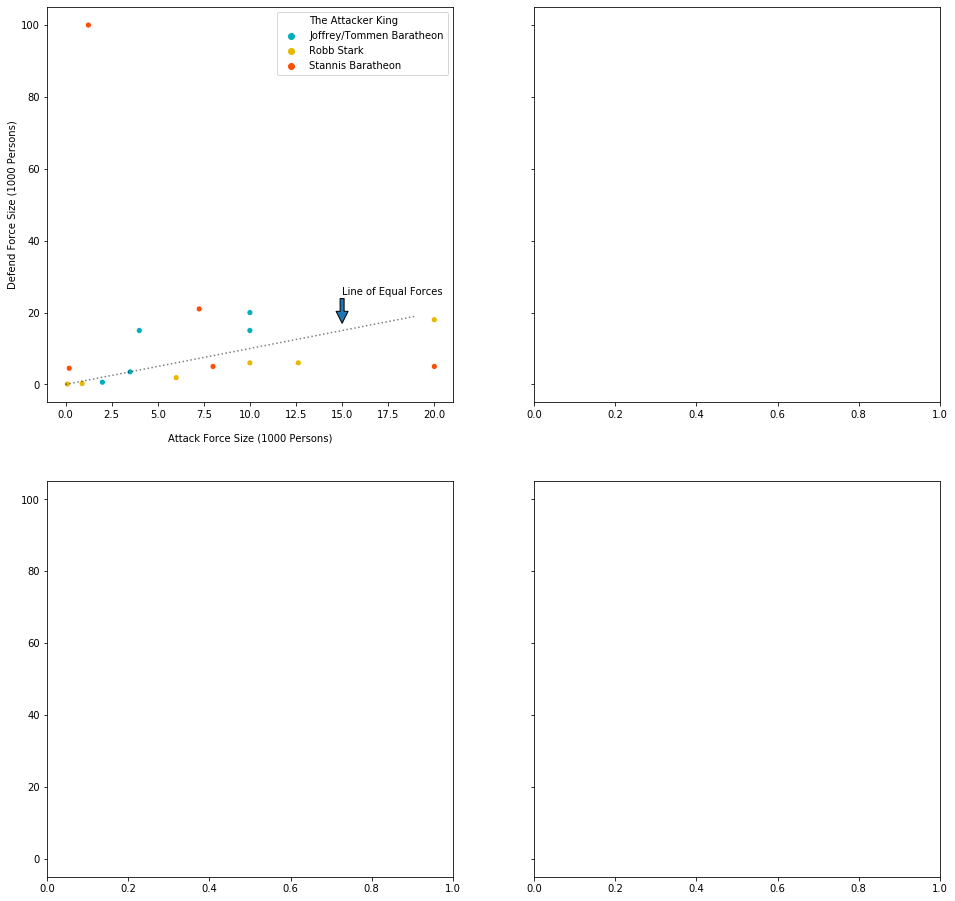

In [3]:
# set the space for 4 plots
figs, axes = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(16,16))

# ----------------------------------------------------------------------
# Upper Left Plot
# compare the ratio of attack forces to defend forces
# ----------------------------------------------------------------------
# clean battles data regarding the attacker/defender force sizes 
battles_cl = battles.copy()
battles_cl = battles_cl.dropna(subset=['attacker_size', 'defender_size'])
# normalize the force sizes
battles_cl['attacker_size'] = battles_cl['attacker_size'].div(1000)
battles_cl['defender_size'] = battles_cl['defender_size'].div(1000)

# draw the plot
sns.scatterplot(data=battles_cl, x='defender_size', y='attacker_size', hue='attacker_king',
                ax=axes[0,0], palette = ('#00AFBB', '#E7B800', '#FC4E07'))
# draw the equality line
x = np.arange(min(battles_cl.attacker_size.max(), battles_cl.defender_size.max()))
axes[0,0].plot(x, x, ':', color='black', alpha=.5)
axes[0,0].annotate('Line of Equal Forces', xy=(15, 17), xytext=(15, 25), arrowprops=dict())

# set the labels and the legend
legend1 = axes[0,0].legend()
legend1.texts[0].set_text('The Attacker King')
axes[0,0].set_ylabel('Defend Force Size (1000 Persons)')
axes[0,0].set_xlabel('Attack Force Size (1000 Persons)', labelpad=14);
